# Self Balancing Robot - Machine Learning to predict KP, KI and KD.
João Victor Palhares Barbosa

## 1.0 Including libraries

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.metrics import Accuracy

from matplotlib import pyplot as plt
from random import sample
from random import randint

2021-10-02 12:27:06.398424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-02 12:27:06.398460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 2.0 Requesting data from API - getting the 1000 registers

In [2]:
r = requests.get("http://192.168.15.131:5000/api/v0.1/selfbalancing/mongodb/1000")
if r.status_code == 200:
    register = json.loads(r.content)

## 3.0 Reading json and inserting on dataframe

In [3]:
df = pd.read_json(json.dumps(register))
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,137,3.51,1,5,22,5.20,-65.72
1,-534,3.28,1,5,22,-0.50,-64.91
2,-3555,2.96,1,5,22,6.20,-60.28
3,-3469,2.47,1,5,22,1.82,-49.52
4,-4376,2.04,1,5,22,5.33,-37.70


### 3.1 Shaping dataframe
1000 registers on 7 columns

In [4]:
df.shape

(1000, 7)

## 4.0 Showing plot: pitch versus gyroy
That can generate the positions of top view

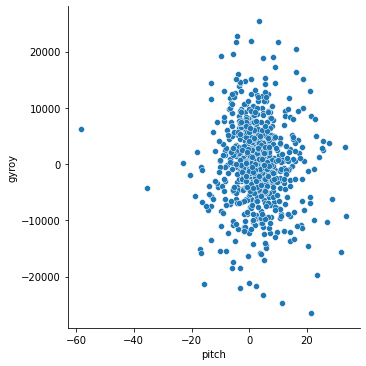

In [5]:
sns.relplot(x = "pitch", y = "gyroy", data = df)

## 5.0 Manipulation a binary classification

In [6]:
for x in range(len(df)):
    if -10000 < df["gyroy"][x] < 10000:
        df.loc[x, "up"] = 1
    else:
        df.loc[x, "up"] = 0

### 5.1 Showing 10 samples of new dataframe

In [7]:
df.sample(10)

,gyroy,kalangley,kd,ki,kp,pitch,res,up
308,687,2.06,1,5,22,5.74,40.41,1.0
845,15071,2.88,1,5,22,18.68,158.31,0.0
522,-1934,0.96,1,5,22,1.38,60.30,1.0
923,-1398,3.95,1,5,22,7.84,-14.77,1.0
698,-18565,2.32,1,5,22,-5.96,-80.09,0.0
292,9329,1.71,1,5,22,7.23,78.50,1.0
981,2971,1.41,1,5,22,6.87,-5.61,1.0
427,1879,2.95,1,5,22,6.37,-25.79,1.0
285,-5678,2.32,1,5,22,2.79,11.94,1.0
921,4148,4.36,1,5,22,0.00,-8.60,1.0


## 6.0 Defining features and targets from dataset

In [8]:
features = df.iloc[:,0:7]
target = df.iloc[:,7]

### 6.1 Showing targets

In [9]:
target

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: up, Length: 1000, dtype: float64

### 6.1 Showing features

In [10]:
features

,gyroy,kalangley,kd,ki,kp,pitch,res
0,137,3.51,1,5,22,5.20,-65.72
1,-534,3.28,1,5,22,-0.50,-64.91
2,-3555,2.96,1,5,22,6.20,-60.28
3,-3469,2.47,1,5,22,1.82,-49.52
4,-4376,2.04,1,5,22,5.33,-37.70
...,...,...,...,...,...,...,...
995,-2209,2.49,1,5,22,6.66,-56.01
996,-2033,2.07,1,5,22,-1.13,-45.02
997,-1602,2.15,1,5,22,8.17,-44.42
998,335,1.80,1,5,22,-6.79,-33.80


## 7.0 Splitting train and test from the dataset, this is based on target and features (already manipulated)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

## 8.0 Generating the Deep Neural Network
- The commented model could detect automatically the best layer to DNN
- The uncommented model can improve the performance based on the best layers

In [12]:
# model = Sequential([tf.keras.layers.Input(shape=(7,)),
#                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2021-10-02 12:27:08.541280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 12:27:08.541632: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-02 12:27:08.541711: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-02 12:27:08.541786: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-02 12:27:08.541857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## 9.0 Compiling the model

In [13]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## 10.0 Fitting the model

In [14]:
history = model.fit(y_train, X_train, epochs=100)

2021-10-02 12:27:08.719641: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
21/21 [==============================] - 0s 974us/step - loss: 417.2613 - accuracy: 0.8507
Epoch 2/100
21/21 [==============================] - 0s 954us/step - loss: 279.8262 - accuracy: 0.6313
Epoch 3/100
21/21 [==============================] - 0s 904us/step - loss: 188.5345 - accuracy: 0.7537
Epoch 4/100
21/21 [==============================] - 0s 926us/step - loss: 104.0125 - accuracy: 0.7164
Epoch 5/100
21/21 [==============================] - 0s 893us/step - loss: 25.5374 - accuracy: 0.6299
Epoch 6/100
21/21 [==============================] - 0s 952us/step - loss: 5.6955 - accuracy: 0.6104
Epoch 7/100
21/21 [==============================] - 0s 940us/step - loss: 2.4873 - accuracy: 0.6970
Epoch 8/100
21/21 [==============================] - 0s 928us/step - loss: 1.4012 - accuracy: 0.7060
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 1.4420 - accuracy: 0.7463
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 1.3066 - a

## 11.0 Getting the batch names from model

In [15]:
model.test_on_batch(y_train, X_train)
model.metrics_names

['loss', 'accuracy']

### 11.1 Getting the history keys names from model

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


## 12.0 Scoring the model

In [17]:
scores = model.evaluate(y_test, X_test)
print("\n")
print("Accuracy of model: ", model.metrics_names[1], scores[1]*100)

11/11 [==============================] - 0s 837us/step - loss: 0.7032 - accuracy: 0.9273


Accuracy of model:  accuracy 92.72727370262146


## 13.0 Generating graphics from model

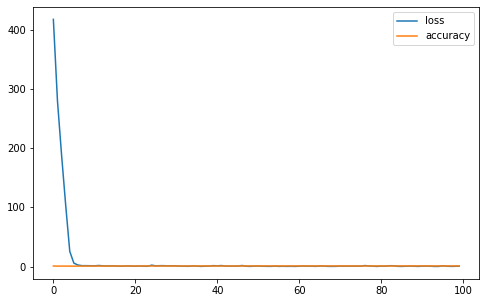

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### 13.1 Graph of loss

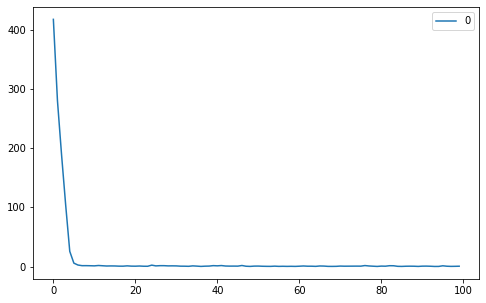

In [19]:
pd.DataFrame(history.history['loss']).plot(figsize=(8,5))
plt.show()

### 13.2 Graph of accuracy

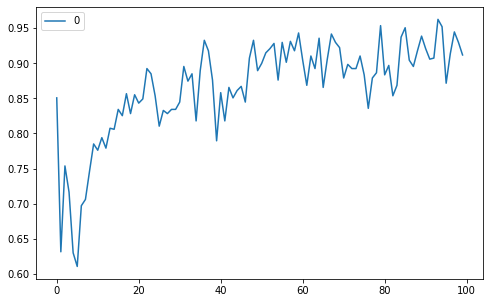

In [20]:
pd.DataFrame(history.history['accuracy']).plot(figsize=(8,5))
plt.show()

## 14.0 Predicting possible results of KP, KI and KD

In [21]:
#kp = 27
#ki = 3
#kd = 4 

prediction = model.predict([[-5000, 2, 4, 3, 27, 0, 20]])
print("Prediction shape: ", prediction*100)

Prediction shape:  [[99.99996]]


## 15.0 Generating possible results of KP, KI and KD

In [22]:
aux = 0
while (1):
  kd = randint(0, 100)
  ki = randint(0, 100)
  kp = randint(0, 100)

  value = [-5000, 2, kd, ki, kp, 0, 20]

  prediction = model.predict([value])*100

  if prediction >= 0.9:
    print("Attempt: ", aux)
    print("Numbers: ", value)
    print("Prediction shape: ", prediction)
  aux += 1

Attempt:  0
Numbers:  [-5000, 2, 84, 6, 26, 0, 20]
Prediction shape:  [[100.]]
Attempt:  1
Numbers:  [-5000, 2, 69, 24, 55, 0, 20]
Prediction shape:  [[100.]]
Attempt:  2
Numbers:  [-5000, 2, 79, 95, 52, 0, 20]
Prediction shape:  [[100.]]
Attempt:  3
Numbers:  [-5000, 2, 80, 41, 85, 0, 20]
Prediction shape:  [[100.]]
Attempt:  4
Numbers:  [-5000, 2, 92, 16, 36, 0, 20]
Prediction shape:  [[100.]]
Attempt:  5
Numbers:  [-5000, 2, 66, 9, 99, 0, 20]
Prediction shape:  [[100.]]
Attempt:  6
Numbers:  [-5000, 2, 40, 79, 22, 0, 20]
Prediction shape:  [[100.]]
Attempt:  7
Numbers:  [-5000, 2, 75, 14, 51, 0, 20]
Prediction shape:  [[100.]]
Attempt:  8
Numbers:  [-5000, 2, 64, 4, 63, 0, 20]
Prediction shape:  [[100.]]
Attempt:  9
Numbers:  [-5000, 2, 81, 44, 28, 0, 20]
Prediction shape:  [[100.]]
Attempt:  10
Numbers:  [-5000, 2, 23, 3, 95, 0, 20]
Prediction shape:  [[100.]]
Attempt:  11
Numbers:  [-5000, 2, 11, 19, 10, 0, 20]
Prediction shape:  [[100.]]
Attempt:  12
Numbers:  [-5000, 2, 4, 24, 8

KeyboardInterrupt: 